In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_parquet(r'C:\Users\leepa\Documents\color_mood_predictor_ml\data\color_pedia.parquet')
df

,Color Name,HEX Code,Category,Description,Emotion,Personality,Mood,Symbolism,Use Case,Keywords,R,G,B,Hue,Saturation,Lightness,Contrast Level
0,Deep Maroon,#D62559,Red Family (Ruby Red),A vibrant and deep shade of maroon.,"Passionate, Intense","Bold, Dramatic","Strong, Powerful","Deep Maroon often symbolizes power, strength, ...",Ideal for creating a striking impact in design...,"Powerful, Passionate, Bold, Deep, Strong, Inte...",214,37,89,342.37,70.52,49.22,Dark
1,Golden Brick,#E5B262,"Warm, Earthy",A warm and inviting shade of golden brown.,"Comfort, Warmth, Optimism","Reliable, Friendly, Approachable","Cozy, Sunlit, Nurturing","Growth, Stability, Harvest",Ideal for creating a warm and inviting atmosph...,"Warm, Golden, Brown, Earthy, Comfortable, Cozy...",229,178,98,36.64,71.58,64.12,Dark
2,Lime Green,#8CCD48,"Bright, Vibrant",A lively shade of green with yellow undertones.,"Energetic, Fresh","Outgoing, Adventurous","Playful, Exciting","Growth, Renewal, Envy (in some cultures)","Ideal for modern design elements, branding for...","Bright, Vibrant, Fresh, Energy, Nature, Green,...",140,205,72,89.32,57.08,54.31,Dark
3,Sage Green #356A40,#356A40,Green,"A rich, muted green shade with a hint of blue.",Calmness and Relaxation,"Stable and reliable, like an old friend.",Serene and earthy.,"Growth, harmony, and balance in nature.",Ideal for spaces promoting relaxation and tran...,"Calm, Earthy, Nature, Reliable, Stable.",53,106,64,132.45,33.33,31.18,Dark
4,Deep Sapphire Blue,#0618DE,"Dark, Intense","A vibrant and rich shade of blue, reminiscent ...","Serene, Luxurious","Majestic, Mysterious","Calm, Elegant","Deep Sapphire Blue often symbolizes wisdom, lo...","Ideal for branding luxury items, technology, o...","Luxurious, Deep, Ocean, Premium, Elegant, Myst...",6,24,222,235.00,94.74,44.71,Dark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Golden Apricot,#D4A35C,"Pastel, Warm",A rich and earthy blend of apricot and gold.,"Warmth, Comfort","Friendly, Approachable","Cozy, Sunlit","Harvest, Abundance, Growth","Ideal for creating warm, inviting interiors or...","Warm, Earthy, Apricot, Golden, Pastel, Autumn,...",212,163,92,35.50,58.25,59.61,Dark
99996,Green-Yellow (Spring Yellow),#98F11F,Secondary,"A lively, vibrant shade that is a blend of gre...","Joyful, Enthusiastic, Invigorating","Bubbly, Vibrant, Optimistic","Energetic, Fresh, Lively","Growth, Renewal, Prosperity, Good Fortune","Ideal for summer or tropical themed designs, a...","Vibrant, Energy, Nature, Freshness, Growth, Sp...",152,241,31,85.43,88.24,53.33,Light
99997,Medium Purple-Blue,#A49BD5,Pastel,A medium shade of purple with a hint of blue.,"Tranquil, Mysterious","Introspective, Creative, Whimsical","Dreamy, Enigmatic","Spirituality, Intuition, Imagination","Ideal for soft backgrounds in graphic design, ...","Purple, Pastel, Blue, Tranquil, Dreamy, Myster...",164,155,213,249.31,40.85,72.16,Dark
99998,Deep Lavender Mauve,#9F1CC5,Purple (Pastel),"A deep, rich shade of lavender with a hint of ...","Serene, Mysterious","Introspective, Creative","Dreamy, Elegant","Transcendence, Spirituality, Intuition","Perfect for romantic themes, luxurious brandin...","Lavender, Mauve, Purple, Pastel, Deep, Rich, D...",159,28,197,286.51,75.11,44.12,Dark


In [48]:
df.head(10)

,Color Name,HEX Code,Category,Description,Emotion,Personality,Mood,Symbolism,Use Case,Keywords,R,G,B,Hue,Saturation,Lightness,Contrast Level
0,Deep Maroon,#D62559,Red Family (Ruby Red),A vibrant and deep shade of maroon.,"Passionate, Intense","Bold, Dramatic","Strong, Powerful","Deep Maroon often symbolizes power, strength, ...",Ideal for creating a striking impact in design...,"Powerful, Passionate, Bold, Deep, Strong, Inte...",214,37,89,342.37,70.52,49.22,Dark
1,Golden Brick,#E5B262,"Warm, Earthy",A warm and inviting shade of golden brown.,"Comfort, Warmth, Optimism","Reliable, Friendly, Approachable","Cozy, Sunlit, Nurturing","Growth, Stability, Harvest",Ideal for creating a warm and inviting atmosph...,"Warm, Golden, Brown, Earthy, Comfortable, Cozy...",229,178,98,36.64,71.58,64.12,Dark
2,Lime Green,#8CCD48,"Bright, Vibrant",A lively shade of green with yellow undertones.,"Energetic, Fresh","Outgoing, Adventurous","Playful, Exciting","Growth, Renewal, Envy (in some cultures)","Ideal for modern design elements, branding for...","Bright, Vibrant, Fresh, Energy, Nature, Green,...",140,205,72,89.32,57.08,54.31,Dark
3,Sage Green #356A40,#356A40,Green,"A rich, muted green shade with a hint of blue.",Calmness and Relaxation,"Stable and reliable, like an old friend.",Serene and earthy.,"Growth, harmony, and balance in nature.",Ideal for spaces promoting relaxation and tran...,"Calm, Earthy, Nature, Reliable, Stable.",53,106,64,132.45,33.33,31.18,Dark
4,Deep Sapphire Blue,#0618DE,"Dark, Intense","A vibrant and rich shade of blue, reminiscent ...","Serene, Luxurious","Majestic, Mysterious","Calm, Elegant","Deep Sapphire Blue often symbolizes wisdom, lo...","Ideal for branding luxury items, technology, o...","Luxurious, Deep, Ocean, Premium, Elegant, Myst...",6,24,222,235.00,94.74,44.71,Dark
5,Scarlet Red,#AD0615,Deep red,"A vibrant, fiery shade of red with an orange u...","Passionate, intense","Bold, dynamic, powerful","Energetic, striking","Fire, courage, determination, love",Ideal for creating a strong visual impact in d...,"Vibrant, bold, fiery, intense, passionate, dyn...",173,6,21,354.61,93.30,35.10,Dark
6,Burnt Sienna,#C45833,Brownish Red,"A vibrant, earthy shade of brown-red.","Passionate, Warm","Bold, Vital, Determined","Inviting, Rich, Intense","Stability, Strength, Harvest","Ideal for creating focal points, adding warmth...","Warm, Earthy, Vibrant, Intense, Rich, Brown, Red.",196,88,51,15.31,58.70,48.43,Dark
7,F9EDB7 (Golden Sand),#F9EDB7,"Pastel, Warm",A sun-kissed sand hue.,"Comfortable, Relaxing, Friendly","Warm, Approachable, Nurturing (as a person)","Sunlit, Cozy, Inviting","It may symbolize warmth, tranquility, and conn...","Ideal for creating a calm, inviting atmosphere...","Warm, Pastel, Sunlit, Cozy, Golden, Sand.",249,237,183,49.09,84.62,84.71,Light
8,Maroon Wine,#860956,Deep Red,A rich and intense shade of red with a hint of...,"Passionate, Dramatic","Mysterious, Strong, Sophisticated","Elegant, Luxurious, Intense","Wisdom, Power, Confidence, Aggression, Courage",Ideal for elegant and sophisticated designs su...,"Dark Red, Rich, Deep, Intense, Mysterious, Lux...",134,9,86,323.04,87.41,28.04,Dark
9,Sage Green,#269379,Green (Secondary),A vibrant and refreshing shade of green.,"Calm, serene","Trustworthy, reliable, stable","Comfortable, natural, soothing","Growth, harmony, balance",Ideal for nature-themed designs or to create a...,"Nature, growth, harmony, calm, serene, trustwo...",38,147,121,165.69,58.92,36.27,Dark


In [49]:
df.tail(10)

,Color Name,HEX Code,Category,Description,Emotion,Personality,Mood,Symbolism,Use Case,Keywords,R,G,B,Hue,Saturation,Lightness,Contrast Level
99990,Sage Green,#B7D136,Natural / Pastel,"A vibrant, yet soothing shade of green.","Calmness, Freshness","Reliable, Balanced, Wise","Tranquil, Serene, Refreshing","Growth, Harmony, Nature",Perfect for creating a peaceful and inviting a...,"Natural, Fresh, Calm, Balanced, Tranquil, Sere...",183,209,54,70.06,62.75,51.57,Dark
99991,Deep Purple,#181D85,Dark,Deep and mysterious shade of purple.,"Mysterious, enigmatic","Secretive, alluring, sophisticated","Intense, intriguing, brooding","Represents spirituality, creativity, or wisdom...","Ideal for logos, branding, and design elements...","Mysterious, royal, enigmatic, luxurious, deep,...",24,29,133,237.25,69.43,30.78,Dark
99992,Sage Green,#367B18,"Natural, Pastel",A vibrant yet soothing shade of green reminisc...,"Calmness, serenity, harmony","Reliable, grounded, earthy","Tranquil, peaceful, natural","Growth, renewal, balance in life",Ideal for creating a relaxing ambiance in home...,"Nature, Forest, Calm, Earthy, Relaxing, Serene...",54,123,24,101.82,67.35,28.82,Dark
99993,Deep Cobalt,#466DE7,Blue,A vibrant and captivating shade of cobalt blue.,"Serene, Energetic","Resilient, Intelligent","Cool, Professional, Intriguing","Represents wisdom, trust, and creativity.","Ideal for tech brands, financial institutions,...","Deep, Cobalt, Blue, Vibrant, Modern, Trustwort...",70,109,231,225.47,77.03,59.02,Dark
99994,Plum Magenta,#C82FFB,"Deep Purple, Magenta",A deep and rich shade of magenta.,"Passionate, Dramatic","Fierce, Mysterious","Intense, Alluring","Represents change, creativity, and spirituality.","Ideal for bold statements in design, branding,...","Vibrant, Dramatic, Rich, Bold, Spiritual, Pass...",200,47,251,285.00,96.23,58.43,Dark
99995,Golden Apricot,#D4A35C,"Pastel, Warm",A rich and earthy blend of apricot and gold.,"Warmth, Comfort","Friendly, Approachable","Cozy, Sunlit","Harvest, Abundance, Growth","Ideal for creating warm, inviting interiors or...","Warm, Earthy, Apricot, Golden, Pastel, Autumn,...",212,163,92,35.50,58.25,59.61,Dark
99996,Green-Yellow (Spring Yellow),#98F11F,Secondary,"A lively, vibrant shade that is a blend of gre...","Joyful, Enthusiastic, Invigorating","Bubbly, Vibrant, Optimistic","Energetic, Fresh, Lively","Growth, Renewal, Prosperity, Good Fortune","Ideal for summer or tropical themed designs, a...","Vibrant, Energy, Nature, Freshness, Growth, Sp...",152,241,31,85.43,88.24,53.33,Light
99997,Medium Purple-Blue,#A49BD5,Pastel,A medium shade of purple with a hint of blue.,"Tranquil, Mysterious","Introspective, Creative, Whimsical","Dreamy, Enigmatic","Spirituality, Intuition, Imagination","Ideal for soft backgrounds in graphic design, ...","Purple, Pastel, Blue, Tranquil, Dreamy, Myster...",164,155,213,249.31,40.85,72.16,Dark
99998,Deep Lavender Mauve,#9F1CC5,Purple (Pastel),"A deep, rich shade of lavender with a hint of ...","Serene, Mysterious","Introspective, Creative","Dreamy, Elegant","Transcendence, Spirituality, Intuition","Perfect for romantic themes, luxurious brandin...","Lavender, Mauve, Purple, Pastel, Deep, Rich, D...",159,28,197,286.51,75.11,44.12,Dark
99999,Rose Brown,#EF9B9B,"Pastel, Neutral","A soft, warm shade of pinkish brown.","Warmth, Comfort, Love","Compassionate, Nurturing, Gentle","Cozy, Inviting, Peaceful","Connection, Femininity, Strength, Healing",Ideal for creating a warm and inviting atmosph...,"Warm, Soft, Pinkish Brown, Neutral, Cozy, Invi...",239,155,155,0.00,72.41,77.25,Dark


In [50]:
df.columns

Index(['Color Name', 'HEX Code', 'Category', 'Description', 'Emotion',
       'Personality', 'Mood', 'Symbolism', 'Use Case', 'Keywords', 'R', 'G',
       'B', 'Hue', 'Saturation', 'Lightness', 'Contrast Level'],
      dtype='object')

In [51]:
df.size

1700000

In [52]:
df.shape

(100000, 17)

In [53]:
df.dtypes

Color Name         object
HEX Code           object
Category           object
Description        object
Emotion            object
Personality        object
Mood               object
Symbolism          object
Use Case           object
Keywords           object
R                   int64
G                   int64
B                   int64
Hue               float64
Saturation        float64
Lightness         float64
Contrast Level     object
dtype: object

In [54]:
df=df.drop(['Color Name','HEX Code','Category','Description','Emotion','Personality','Mood','Symbolism','Use Case','Keywords','Contrast Level'],axis=1,)
df

,R,G,B,Hue,Saturation,Lightness
0,214,37,89,342.37,70.52,49.22
1,229,178,98,36.64,71.58,64.12
2,140,205,72,89.32,57.08,54.31
3,53,106,64,132.45,33.33,31.18
4,6,24,222,235.00,94.74,44.71
...,...,...,...,...,...,...
99995,212,163,92,35.50,58.25,59.61
99996,152,241,31,85.43,88.24,53.33
99997,164,155,213,249.31,40.85,72.16
99998,159,28,197,286.51,75.11,44.12


In [55]:
df.shape

(100000, 6)

In [56]:
#We need to add Brightness column so we are adding it
#We are using the luminance formulae to add this column
#And this is the equation
df['Brightness']=0.299*df['R']+0.587*df['G']+0.114*df['B']
df

,R,G,B,Hue,Saturation,Lightness,Brightness
0,214,37,89,342.37,70.52,49.22,95.851
1,229,178,98,36.64,71.58,64.12,184.129
2,140,205,72,89.32,57.08,54.31,170.403
3,53,106,64,132.45,33.33,31.18,85.365
4,6,24,222,235.00,94.74,44.71,41.190
...,...,...,...,...,...,...,...
99995,212,163,92,35.50,58.25,59.61,169.557
99996,152,241,31,85.43,88.24,53.33,190.449
99997,164,155,213,249.31,40.85,72.16,164.303
99998,159,28,197,286.51,75.11,44.12,86.435


In [57]:
df.isna().sum()

R             0
G             0
B             0
Hue           0
Saturation    0
Lightness     0
Brightness    0
dtype: int64

In [58]:
#This is used to run and show the values 
df[['Brightness','Saturation','Lightness']].describe()

,Brightness,Saturation,Lightness
count,100000.000000,100000.000000,100000.000000
mean,127.521698,66.894212,50.006995
std,49.468920,23.807429,15.904531
min,1.228000,0.000000,0.780000
25%,89.686750,50.000000,39.610000
50%,127.183000,70.945000,50.000000
75%,165.596000,86.980000,60.390000
max,254.772000,100.000000,99.800000


In [59]:
def Label(row):
    brightness = row['Brightness']
    saturation = row['Saturation']

    score = 0
    if brightness < 50:
        score -= 1
    elif brightness > 180:
        score += 1

    if saturation > 85:
        score -= 1
    elif saturation < 50:
        score += 1

    # Add randomness for borderline cases
    rand = np.random.rand()
    if score <= -1:
        return 'Bad' if rand < 0.9 else 'Average'
    elif score >= 1:
        return 'Good' if rand < 0.9 else 'Average'
    else:
        # borderline Average with some chance to be Good/Bad
        if rand < 0.1:
            return 'Bad'
        elif rand > 0.9:
            return 'Good'
        else:
            return 'Average'

# ========================
# 2️⃣ Apply labels to dataset
# ========================
df['Label'] = df.apply(Label, axis=1)

In [60]:
df['Label'].value_counts(normalize=True) * 100

Label
Average    40.407
Good       32.793
Bad        26.800
Name: proportion, dtype: float64

In [61]:
df

,R,G,B,Hue,Saturation,Lightness,Brightness,Label
0,214,37,89,342.37,70.52,49.22,95.851,Bad
1,229,178,98,36.64,71.58,64.12,184.129,Good
2,140,205,72,89.32,57.08,54.31,170.403,Good
3,53,106,64,132.45,33.33,31.18,85.365,Good
4,6,24,222,235.00,94.74,44.71,41.190,Bad
...,...,...,...,...,...,...,...,...
99995,212,163,92,35.50,58.25,59.61,169.557,Average
99996,152,241,31,85.43,88.24,53.33,190.449,Average
99997,164,155,213,249.31,40.85,72.16,164.303,Good
99998,159,28,197,286.51,75.11,44.12,86.435,Good


In [62]:
df['Label'].value_counts()

Label
Average    40407
Good       32793
Bad        26800
Name: count, dtype: int64

In [63]:
# x=df[:,:-1].values_counts()
x=df[['R','G','B','Hue','Saturation','Lightness']].copy()
x

,R,G,B,Hue,Saturation,Lightness
0,214,37,89,342.37,70.52,49.22
1,229,178,98,36.64,71.58,64.12
2,140,205,72,89.32,57.08,54.31
3,53,106,64,132.45,33.33,31.18
4,6,24,222,235.00,94.74,44.71
...,...,...,...,...,...,...
99995,212,163,92,35.50,58.25,59.61
99996,152,241,31,85.43,88.24,53.33
99997,164,155,213,249.31,40.85,72.16
99998,159,28,197,286.51,75.11,44.12


In [64]:
y=df['Label'].copy()
y

0            Bad
1           Good
2           Good
3           Good
4            Bad
          ...   
99995    Average
99996    Average
99997       Good
99998       Good
99999       Good
Name: Label, Length: 100000, dtype: object

In [65]:
df['Label'].isna().sum()

np.int64(0)

In [66]:
#Now we got input and output columns seperated we can run the train test split

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
xtrain

,R,G,B,Hue,Saturation,Lightness
53740,255,101,169,333.51,100.00,69.80
79376,190,137,183,307.92,28.96,64.12
62465,196,194,235,242.93,50.62,84.12
99998,159,28,197,286.51,75.11,44.12
72655,124,60,96,326.25,34.78,36.08
...,...,...,...,...,...,...
2872,163,29,75,339.40,69.79,37.65
51146,85,232,175,156.73,76.17,62.16
34890,71,68,78,258.00,6.85,28.63
45360,75,88,248,235.49,92.51,63.33


In [67]:
#The output columns are Object wwe need to encode it into numeric
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
ytrainencode=lab.fit_transform(ytrain.values.ravel())
ytestencode=lab.transform(ytest.values.ravel())

In [68]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
 # xtrain=scaler.fit_transform(xtrain)
# xtest=scaler.transform(xtest)

In [69]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
xtrain_res,ytrain_res=sm.fit_resample(xtrain,ytrainencode)


In [70]:
xtest

,R,G,B,Hue,Saturation,Lightness
50076,201,71,135,330.46,54.62,53.33
58464,17,112,142,194.40,78.62,31.18
62813,86,205,249,196.20,93.14,65.69
12829,217,31,244,292.39,90.64,53.92
74538,163,80,84,357.11,34.16,47.65
...,...,...,...,...,...,...
54029,207,120,68,22.45,59.15,53.92
78617,172,57,30,11.41,70.30,39.61
31020,117,94,161,260.60,26.27,50.00
99404,67,148,136,171.11,37.67,42.16


In [71]:
ytrain

53740    Average
79376       Good
62465       Good
99998       Good
72655       Good
          ...   
2872        Good
51146       Good
34890       Good
45360    Average
34230    Average
Name: Label, Length: 80000, dtype: object

In [72]:
ytest

50076    Average
58464    Average
62813        Bad
12829        Bad
74538    Average
          ...   
54029       Good
78617    Average
31020       Good
99404       Good
54183        Bad
Name: Label, Length: 20000, dtype: object

In [73]:
#The output columns are Object wwe need to encode it into numeric
# from sklearn.preprocessing import LabelEncoder
# lab=LabelEncoder()
# ytrainencode=lab.fit_transform(ytrain.values.ravel())
# ytestencode=lab.transform(ytest.values.ravel())

In [74]:
print(lab.classes_)

['Average' 'Bad' 'Good']


In [75]:
for i, Label in enumerate(lab.classes_):
    print(f"{Label} = {i}")


Average = 0
Bad = 1
Good = 2


In [76]:
print(lab.classes_)

['Average' 'Bad' 'Good']


In [77]:
#Building the models

#1: Logistic Regression
from sklearn.linear_model import LogisticRegression
lrmodel=LogisticRegression(max_iter=1000,class_weight='balanced',random_state=42)
lrmodel.fit(xtrain,ytrainencode)
ypred=lrmodel.predict(xtest)
ypred

array([0, 1, 1, ..., 2, 2, 0], shape=(20000,))

In [78]:
print(lrmodel.predict(scaler.transform([[34,0,1,153.0,212,0]])))

[2]


c:\Users\leepa\Documents\color_mood_predictor_ml\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\leepa\Documents\color_mood_predictor_ml\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [79]:
from sklearn.metrics import accuracy_score
print("logi reg:",accuracy_score(ytestencode,ypred)) 

logi reg: 0.708


In [80]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rfmodel=RandomForestClassifier(n_estimators=500,max_depth=20,random_state=42)
rfmodel.fit(xtrain, ytrainencode)
ypred=rfmodel.predict(xtest)
ypred



array([0, 0, 1, ..., 2, 2, 0], shape=(20000,))

In [81]:
print(rfmodel.predict([[34,0,1,153.0,212,0]]))

[1]


c:\Users\leepa\Documents\color_mood_predictor_ml\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [82]:
from sklearn.metrics import accuracy_score
print("rf model:",accuracy_score(ytestencode,ypred)) 

rf model: 0.8502


In [83]:
#Xgboost
from xgboost import XGBClassifier
xgmodel=XGBClassifier(objective="multi:softprob",num_class=3, eval_metric='mlogloss')
xgmodel.fit(xtrain, ytrainencode)
ypred=xgmodel.predict(xtest)
ypred




array([0, 0, 1, ..., 2, 2, 0], shape=(20000,))

In [84]:
print(xgmodel.predict([[34,0,1,153.0,212,0]]))

[1]


In [85]:
from sklearn.metrics import accuracy_score
print("xgmodel:",accuracy_score(ytestencode,ypred)) 

xgmodel: 0.8482


In [86]:
from sklearn.tree import DecisionTreeClassifier
dtreemodel = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dtreemodel.fit(xtrain, ytrainencode)
ypred = dtreemodel.predict(xtest)
ypred

array([0, 0, 1, ..., 2, 2, 0], shape=(20000,))

In [87]:
print(dtreemodel.predict([[34,0,1,153.0,212,0]]))

[1]


c:\Users\leepa\Documents\color_mood_predictor_ml\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [88]:
from sklearn.metrics import accuracy_score
print("dtree:",accuracy_score(ytestencode,ypred)) 

dtree: 0.7333


In [89]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytestencode,ypred)
cm

array([[5504, 1219, 1358],
       [1204, 4028,  128],
       [1318,  107, 5134]])

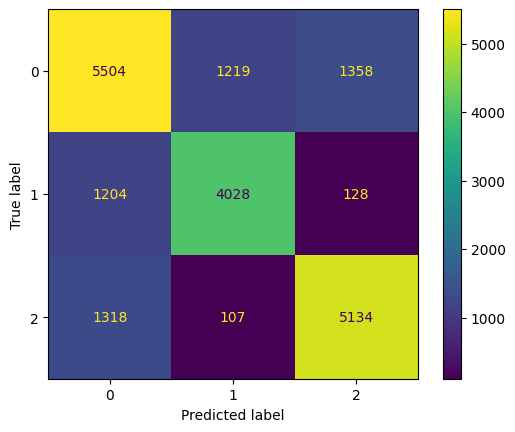

In [90]:
from sklearn.metrics import ConfusionMatrixDisplay
label=['0','1','2']
cmd=ConfusionMatrixDisplay(cm,display_labels=label)
cmd.plot()

In [91]:
from sklearn.metrics import classification_report
print(classification_report(ytestencode,ypred,target_names=lab.classes_))

              precision    recall  f1-score   support

     Average       0.69      0.68      0.68      8081
         Bad       0.75      0.75      0.75      5360
        Good       0.78      0.78      0.78      6559

    accuracy                           0.73     20000
   macro avg       0.74      0.74      0.74     20000
weighted avg       0.73      0.73      0.73     20000



In [92]:
score=accuracy_score(ytestencode,ypred)*100
score

73.33